In [73]:
pip install bt

Note: you may need to restart the kernel to use updated packages.


In [74]:
import bt
import matplotlib
import pandas as pd
%matplotlib inline

In [75]:
# download data
data = bt.get('lcid', start='2010-01-01')

sma = data.rolling(9).mean()

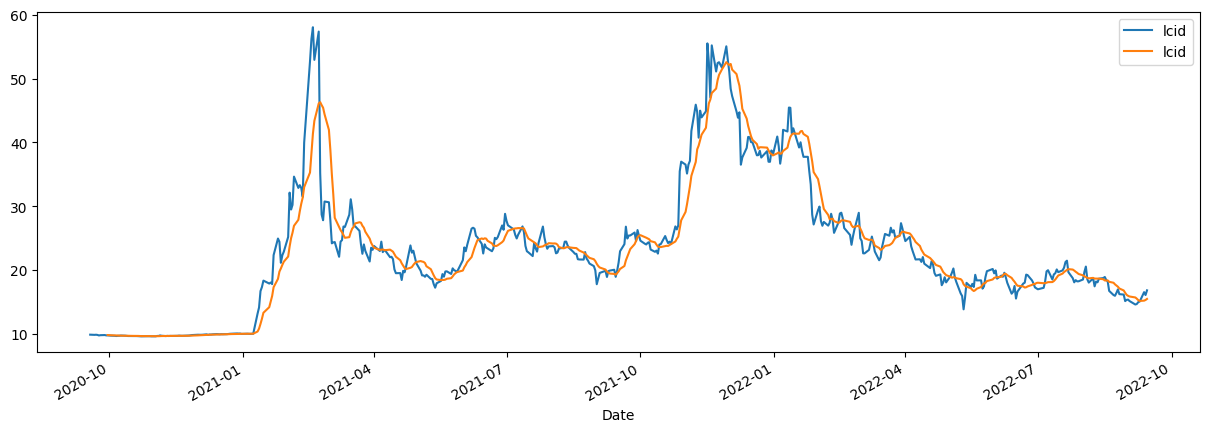

In [76]:
plot = bt.merge(data, sma).plot(figsize=(15, 5))

In [77]:
class SelectWhere(bt.Algo):
    
    """
    Selects securities based on an indicator DataFrame.
    
    Selects securities where the value is True on the current date (target.now).
    
    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)
    
    Sets:
        * selected
    
    """
    def __init__(self, signal):
        self.signal = signal
        
    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected
        
        # return True because we want to keep on moving down the stack
        return True

In [78]:
# first we create the Strategy
s = bt.Strategy('above9sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t)

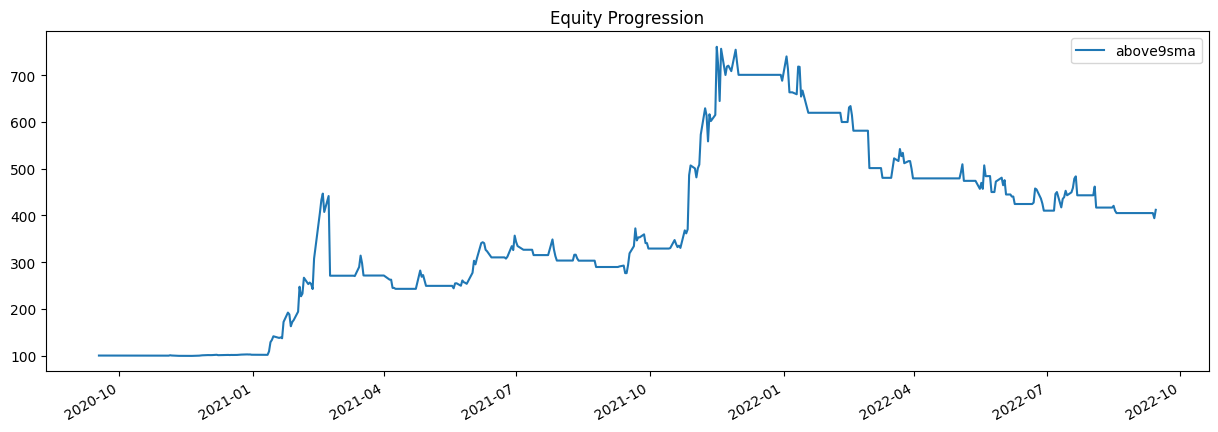

In [79]:
res.plot();

In [80]:
res.display()

Stat                 above9sma
-------------------  -----------
Start                2020-09-17
End                  2022-09-14
Risk-free rate       0.00%

Total Return         311.81%
Daily Sharpe         1.29
Daily Sortino        2.45
CAGR                 103.62%
Max Drawdown         -48.22%
Calmar Ratio         2.15

MTD                  1.72%
3m                   -2.93%
6m                   -14.25%
YTD                  -40.14%
1Y                   49.03%
3Y (ann.)            103.62%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  103.62%

Daily Sharpe         1.29
Daily Sortino        2.45
Daily Mean (ann.)    101.36%
Daily Vol (ann.)     78.53%
Daily Skew           1.43
Daily Kurt           19.30
Best Day             31.82%
Worst Day            -38.63%

Monthly Sharpe       1.17
Monthly Sortino      5.17
Monthly Mean (ann.)  101.15%
Monthly Vol (ann.)   86.38%
Monthly Skew         1.42
Monthly Kurt         0.94
Best Month           72.99%
Worst Month          -1

In [81]:
print(data)

                 lcid
Date                 
2020-09-18   9.890000
2020-09-21   9.860000
2020-09-22   9.880000
2020-09-23   9.850000
2020-09-24   9.770000
...               ...
2022-09-08  14.990000
2022-09-09  15.080000
2022-09-12  16.549999
2022-09-13  16.100000
2022-09-14  16.834999

[501 rows x 1 columns]
